# Importing important libraries

# New Section

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Preprocessing

In [0]:
data = pd.read_excel('ML_project_final.xlsx')
data.tail()

,Company_id,Company_Status,Age_of_company_in_years,Internet_activity_Score,Focus_function,Total_investors,Employee_Count,Has_the_team_size_grown,Last_Funding_Amount,Continent_of_company,Number_of_Investors_in_Seed,Number_of_Investors_in_Angel_andor_VC,Number_of_Cofounders,Number_of_advisors,Team_size_Senior_leadership,Team_size_all_employees,Presenceofatopangelorventurefundinpreviousroundofinvestment,Numberofofrepeatinvestors,NumberofSalesSupportmaterialL,Workedintopcompanies,AveragesizeofcompaniesworkedforinthepastL,Havebeenpartofstartupsinthepast,Havebeenpartofsuccessfulstartupsinthepast,WasheorshepartnerinBig5consulting,Consultingexperience,Productorservicecompany,Cateringtoproductserviceacrossverticals,Focusonprivateorpublicdata,Focusonconsumerdata,Focusonstructuredorunstructureddata,Subscriptionbasedbusiness,Cloudorplatformbasedseriveproduct,Localorglobalplayer,LinearorNonlinearbusinessmodel,Capitalintensivebusiness,NumberofofPartnersofcompanyL,Crowdsourcingbasedbusiness,Crowdfundingbasedbusiness,MachineLearningbasedbusiness,PredictiveAnalyticsbusiness,...,HighesteducationL,Yearsofeducation,Relevanceofeducationtoventure,Relevanceofexperiencetoventure,DegreefromaTier1orTier2university,Renownedinprofessionalcircle,ExperienceinsellingandbuildingproductsL,ExperienceinFortune100organizations,ExperienceinFortune500organizations,ExperienceinFortune1000organizations,TopmanagementsimilarityL,NumberofRecognitionsforFoundersandCofounders,NumberofResearchpublicationsL,Skillsscore,TeamCompositionscoreL,DificultyofObtainingWorkforceL,PricingStrategy,Hyperlocalisation,Timetomarketserviceorproduct,Longtermrelationshipwithotherfounders,Proprietaryorpatentpositioncompetitiveposition,Barriersofentryforthecompetitors,Companyawards,Controversialhistoryoffounderorcofounder,Legalriskandintellectualproperty,googlepagerankofcompanywebsite,Technicalproficienciestoanalyseandinterpretunstructureddata,Solutionsoffered,Investedthroughglobalincubationcompetitions,Industrytrendininvesting,DisruptivenessoftechnologyL,NumberofDirectcompetitors,Employeesperyearofcompanyexistence,LastroundoffundingreceivedinmilionUSD,Survivalthroughrecessionbasedonexistenceofthecompanythroughreces,Timeto1stinvestmentinmonths,Avgtimetoinvestmentaverageacrossallroundsmeasuredfrompreviousinv,Gartnerhypecyclestage,Timetomaturityoftechnologyinyears,Renownscore
467,468,0,3.000000,-5.000000,3,1.960045,-20.691802,0,6.585624e+05,1,0.000000,0.000000,0,0,1,1.198368,0,0.000000,1,0,1,1,1,0,0,1,1,0,0,3,0,2,1,2,0,0.165073,0,0,0,0,...,1,19.993955,1,1,0,461.795809,2,0,0,0,0,45.941573,0,19.688125,1,1,0,0,1,0,0,1,0,0,0,4.686764e+06,0,1,0,3,2,2.810880,4.382598,0.336817,2,3.534170,6.194215,5,2,1.986091
468,469,0,4.850063,6.993298,1,3.558150,-4.412020,0,2.129869e+06,1,0.000000,4.000000,0,0,1,20.340732,0,0.000000,1,0,1,1,1,0,0,2,0,0,0,3,0,2,2,1,1,0.111711,0,0,0,0,...,1,20.657823,1,1,0,444.171451,2,0,0,0,0,53.091021,0,17.910411,1,1,0,0,1,0,0,1,0,0,0,4.064527e+06,0,1,0,3,2,1.437588,2.810184,1.548642,2,11.186490,9.366353,5,2,0.000000
469,470,0,4.000000,0.000000,1,3.185666,0.000000,0,1.882888e+06,1,1.636609,0.431258,2,0,1,33.139739,0,0.334441,1,0,1,1,1,0,0,2,0,3,0,3,1,1,2,2,0,0.094998,0,0,1,1,...,1,19.697473,1,1,0,452.001491,2,0,0,0,0,63.872531,0,21.483696,1,1,0,0,1,0,0,1,0,0,0,3.958436e+06,0,1,0,3,2,2.368289,8.401463,1.767919,2,8.041912,8.831707,5,2,3.018497
470,471,0,5.000000,0.000000,5,3.027159,-7.925634,0,1.000000e+05,1,1.682614,0.346231,3,2,1,-55.166615,0,0.885422,1,0,1,1,1,0,0,2,1,3,0,3,1,1,2,1,0,0.050810,0,0,1,1,...,1,19.582242,1,1,0,450.810267,2,0,0,0,0,77.290067,0,22.016017,1,1,0,0,1,0,0,1,0,0,0,4.154496e+06,0,1,0,3,2,2.024996,-5.350055,0.267160,2,11.989483,9.142877,5,2,3.905644
471,472,0,1.000000,11.000000,1,2.000000,-34.330370,0,1.200000e+05,1,0.000000,0.000000,3,0,1,-56.827979,0,1.000000,1,0,1,1,1,0,0,1,1,3,0,2,1,0,2,2,0,0.084478,0,0,1,1,...,1,19.632104,1,1,0,447.784022,2,0,0,0,0,58.897627,0,20.575345,1,1,0,0,1,0,0,1,0,0,0,3.454981e+06,0,1,0,3,2,2.962571,4.023156,0.360535,2,-6.730279,1.37

In [0]:
data.shape

(472, 92)

In [0]:
# %of null vales in dataset
(data.isnull().sum()/data.shape[0])*100


Company_id                                                          0.0
Company_Status                                                      0.0
Age_of_company_in_years                                             0.0
Internet_activity_Score                                             0.0
Focus_function                                                      0.0
                                                                   ... 
Timeto1stinvestmentinmonths                                         0.0
Avgtimetoinvestmentaverageacrossallroundsmeasuredfrompreviousinv    0.0
Gartnerhypecyclestage                                               0.0
Timetomaturityoftechnologyinyears                                   0.0
Renownscore                                                         0.0
Length: 92, dtype: float64

It seems data has no more missing values...so we can proceed

In [0]:
X = data.drop(['Company_Status','Company_id'], axis=1)

In [0]:
X.shape

(472, 90)

In [0]:
y = data['Company_Status']
y.shape

(472,)

# Features_importance using RandomForestClassifier

Let's get feature importance of all 90 columns using RandomForest classifier 

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10)


In [0]:
model.fit(X,y)
model.score(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9957627118644068

In [0]:
feature_importances_rf = pd.DataFrame(model.feature_importances_, index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf.shape

(90, 1)

In [0]:
feature_importances_rf.head()

,importance
DificultyofObtainingWorkforceL,0.085489
Gartnerhypecyclestage,0.055829
Age_of_company_in_years,0.054118
Renownedinprofessionalcircle,0.048089
googlepagerankofcompanywebsite,0.042484


In [0]:
percent_importance_rf = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_importance_rf.append(feature_importances_rf.importance.head(i).sum())
  print(f"For {i} features-> {percent_importance_rf[int(a)]}")
  a=a+1

For 10 features-> 0.43571614259666847
For 20 features-> 0.6443521911613754
For 30 features-> 0.7843701481989633
For 40 features-> 0.8634114081827395
For 50 features-> 0.916100573378795
For 60 features-> 0.9582686594237365
For 70 features-> 0.9850426291360431
For 80 features-> 0.9989759017615703
For 90 features-> 1.0


Let's visualise the importance of features graphically

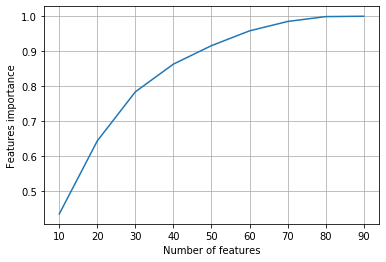

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_importance_rf
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.show()

In [0]:
feature_importances_rf.to_excel('FI_rf.xlsx')

# Features_importance using XGBoostClassifier

In [0]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X, y)
xgb_clf.score(X,y)

1.0

In [0]:
importances_xbg = xgb_clf.feature_importances_

feature_importances_xgb = pd.DataFrame(xgb_clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
                                  
feature_importances_xgb.head()

,importance
googlepagerankofcompanywebsite,0.074522
Technicalproficienciestoanalyseandinterpretunstructureddata,0.066430
TopmanagementsimilarityL,0.040512
Renownedinprofessionalcircle,0.037529
ExperienceinsellingandbuildingproductsL,0.035818


In [0]:
percent_importance_xgb = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_importance_xgb.append(feature_importances_xgb.importance.head(i).sum())
  print(f"For {i} features-> {percent_importance_xgb[int(a)]}")
  a=a+1

For 10 features-> 0.3983774185180664
For 20 features-> 0.6256094574928284
For 30 features-> 0.7706154584884644
For 40 features-> 0.867672860622406
For 50 features-> 0.9420369267463684
For 60 features-> 0.990154504776001
For 70 features-> 1.0
For 80 features-> 1.0
For 90 features-> 1.0


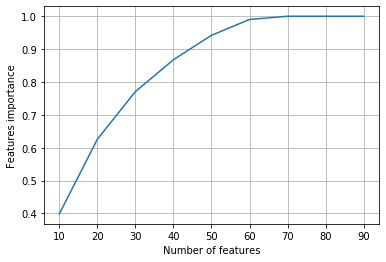

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_importance_xgb
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.show()

In [0]:
feature_importances_xgb.to_excel('FI_xgb.xlsx')

# Features_importance using GradientBoostingClassifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier()
gb_clf2.fit(X, y)
gb_clf2.score(X,y)

1.0

In [0]:
importances_gbclf = gb_clf2.feature_importances_

feature_importances_gbclf = pd.DataFrame(gb_clf2.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
                                  
feature_importances_gbclf.head()

,importance
googlepagerankofcompanywebsite,0.270796
Technicalproficienciestoanalyseandinterpretunstructureddata,0.081572
Survivalthroughrecessionbasedonexistenceofthecompanythroughreces,0.068825
DificultyofObtainingWorkforceL,0.068478
Renownedinprofessionalcircle,0.049036


In [0]:
percent_importance_gb = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_importance_gb.append(feature_importances_gbclf.importance.head(i).sum())
  print(f"For {i} features-> {percent_importance_gb[int(a)]}")
  a=a+1

For 10 features-> 0.7189428491477113
For 20 features-> 0.8742042571188688
For 30 features-> 0.9419452970923002
For 40 features-> 0.9776185071982454
For 50 features-> 0.9931363169124661
For 60 features-> 0.9996639962568473
For 70 features-> 1.0000000000000002
For 80 features-> 1.0
For 90 features-> 1.0


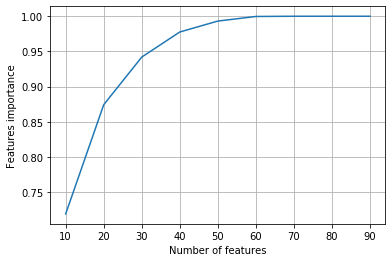

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_importance_gb
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.show()

In [0]:
feature_importances_gbclf.to_excel('FI_gb.xlsx')

# Feature_importance by taking mean of above three classifier

In [0]:
imp_features = pd.read_excel('Final_features_importance_mean.xlsx')
imp_features.shape

(90, 2)

In [0]:
imp_features.head()

,Features_name,Features_importance_mean
0,googlepagerankofcompanywebsite,0.143468
1,Technicalproficienciestoanalyseandinterpretuns...,0.064479
2,Internet_activity_Score,0.046067
3,Renownedinprofessionalcircle,0.041973
4,Survivalthroughrecessionbasedonexistenceofthec...,0.035294


In [0]:
percent_imp = []
a=0
for i in [10,20,30,40,50,60,70,80,90]:
  percent_imp.append(imp_features.Features_importance_mean.head(i).sum())
  print(f"For {i} features-> {percent_imp[int(a)]}")
  a=a+1



For 10 features-> 0.48559023301852533
For 20 features-> 0.6769257987562622
For 30 features-> 0.8032097120129373
For 40 features-> 0.8798612564956971
For 50 features-> 0.9374169986404379
For 60 features-> 0.9735699879643498
For 70 features-> 0.9908671316905961
For 80 features-> 0.9979351774419865
For 90 features-> 1.0000000067908936


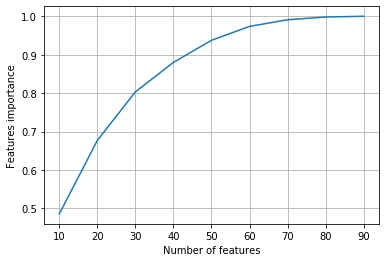

In [0]:
x_axis = [10,20,30,40,50,60,70,80,90]
y_axis = percent_imp
plt.plot(x_axis, y_axis)
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Features importance')
plt.show()

# Selection of top 50 **features**

In [0]:
#selecting number of features
df50 = imp_features.head(50)
df = df50
df.shape

(50, 2)

In [0]:
df.Features_name.to_numpy()

array(['googlepagerankofcompanywebsite',
       'Technicalproficienciestoanalyseandinterpretunstructureddata',
       'Internet_activity_Score', 'Renownedinprofessionalcircle',
       'Survivalthroughrecessionbasedonexistenceofthecompanythroughreces',
       'TeamCompositionscoreL', 'DificultyofObtainingWorkforceL',
       'ExperienceinsellingandbuildingproductsL',
       'Employeesperyearofcompanyexistence', 'TopmanagementsimilarityL',
       'Focusonstructuredorunstructureddata',
       'NumberofSalesSupportmaterialL',
       'NumberofRecognitionsforFoundersandCofounders',
       'Age_of_company_in_years', 'Focusonprivateorpublicdata',
       'NumberofDirectcompetitors', 'Continent_of_company',
       'DisruptivenessoftechnologyL', 'Gartnerhypecyclestage',
       'DegreefromaTier1orTier2university',
       'Cateringtoproductserviceacrossverticals', 'BigDataBusiness',
       'Yearsofeducation', 'Localorglobalplayer', 'Employee_Count',
       'Avgtimetoinvestmentaverageacrossallroundsm

In [0]:
features = pd.DataFrame()
for col in X.columns:
   if(col in df.Features_name.to_numpy()):
       features[col]=X[col].iloc[:]

In [0]:
features.shape

(472, 50)

In [0]:
features.head()

,Age_of_company_in_years,Internet_activity_Score,Focus_function,Employee_Count,Last_Funding_Amount,Continent_of_company,Number_of_Investors_in_Seed,Team_size_Senior_leadership,Team_size_all_employees,Numberofofrepeatinvestors,NumberofSalesSupportmaterialL,Cateringtoproductserviceacrossverticals,Focusonprivateorpublicdata,Focusonstructuredorunstructureddata,Cloudorplatformbasedseriveproduct,Localorglobalplayer,Crowdsourcingbasedbusiness,BigDataBusiness,Isthecompanyanaggregatormarketplacee.g.Bluekai,B2CorB2Bventure,TopforumslikeTechcrunchorVenturebeattalkingaboutthecompanymodelH,BreadthofexperienceacrossverticalsL,HighesteducationL,Yearsofeducation,DegreefromaTier1orTier2university,Renownedinprofessionalcircle,ExperienceinsellingandbuildingproductsL,ExperienceinFortune500organizations,TopmanagementsimilarityL,NumberofRecognitionsforFoundersandCofounders,NumberofResearchpublicationsL,Skillsscore,TeamCompositionscoreL,DificultyofObtainingWorkforceL,Hyperlocalisation,Timetomarketserviceorproduct,Longtermrelationshipwithotherfounders,googlepagerankofcompanywebsite,Technicalproficienciestoanalyseandinterpretunstructureddata,Solutionsoffered,Industrytrendininvesting,DisruptivenessoftechnologyL,NumberofDirectcompetitors,Employeesperyearofcompanyexistence,LastroundoffundingreceivedinmilionUSD,Survivalthroughrecessionbasedonexistenceofthecompanythroughreces,Timeto1stinvestmentinmonths,Avgtimetoinvestmentaverageacrossallroundsmeasuredfrompreviousinv,Gartnerhypecyclestage,Renownscore
0,5.069814,-1.0,4,3.000000,4.500000e+05,1,2.0,2,15.0,4.0,0,0,2,1,2,2,0,0,1,1,3,1,2,21.0,2,500.00000,2,0,0,0.0,0,0.0,1,1,0,3,0,9626884.0,0,1,2,1,0.0,2.0,0.0,2,6.801546,12.0,5,0.0
1,3.000000,125.0,2,11.632394,5.070970e+06,1,5.0,4,20.0,0.0,2,0,3,1,2,1,1,1,0,1,1,3,2,21.0,2,500.00000,3,0,2,13.0,0,34.0,3,2,0,1,0,1067034.0,1,1,3,2,0.0,7.0,5.0,2,10.000000,9.0,3,8.0
2,3.000000,455.0,1,14.000000,2.350000e+06,1,15.0,7,10.0,0.0,1,1,2,1,3,1,0,1,0,2,1,1,1,18.0,3,500.00000,3,0,2,18.0,0,36.0,3,2,0,1,1,71391.0,1,1,3,2,0.0,3.0,2.0,2,2.000000,7.0,3,9.0
3,5.000000,-99.0,2,45.000000,1.025000e+07,1,6.0,4,50.0,0.0,1,1,3,3,2,1,1,0,0,1,2,1,1,18.0,3,460.55821,1,0,2,2.0,0,16.0,2,2,0,1,0,11847.0,0,1,4,2,2.0,10.0,10.0,2,1.000000,9.0,3,5.0
4,4.000000,496.0,2,39.000000,5.500000e+06,1,7.0,8,40.0,0.0,3,1,3,1,2,1,0,1,0,2,1,2,1,18.0,0,500.00000,3,0,1,5.0,1,23.0,2,2,0,1,1,201814.0,1,1,3,2,0.0,10.0,6.0,2,13.000000,10.0,5,6.0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.20)

In [0]:
X_train.shape, X_test.shape

((377, 50), (95, 50))

In [0]:
y_train.shape, y_test.shape

((377,), (95,))

# ML Algorithms

## Naive **Bayes**


In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model_Gaus = GaussianNB()
model_MultiN = MultinomialNB()

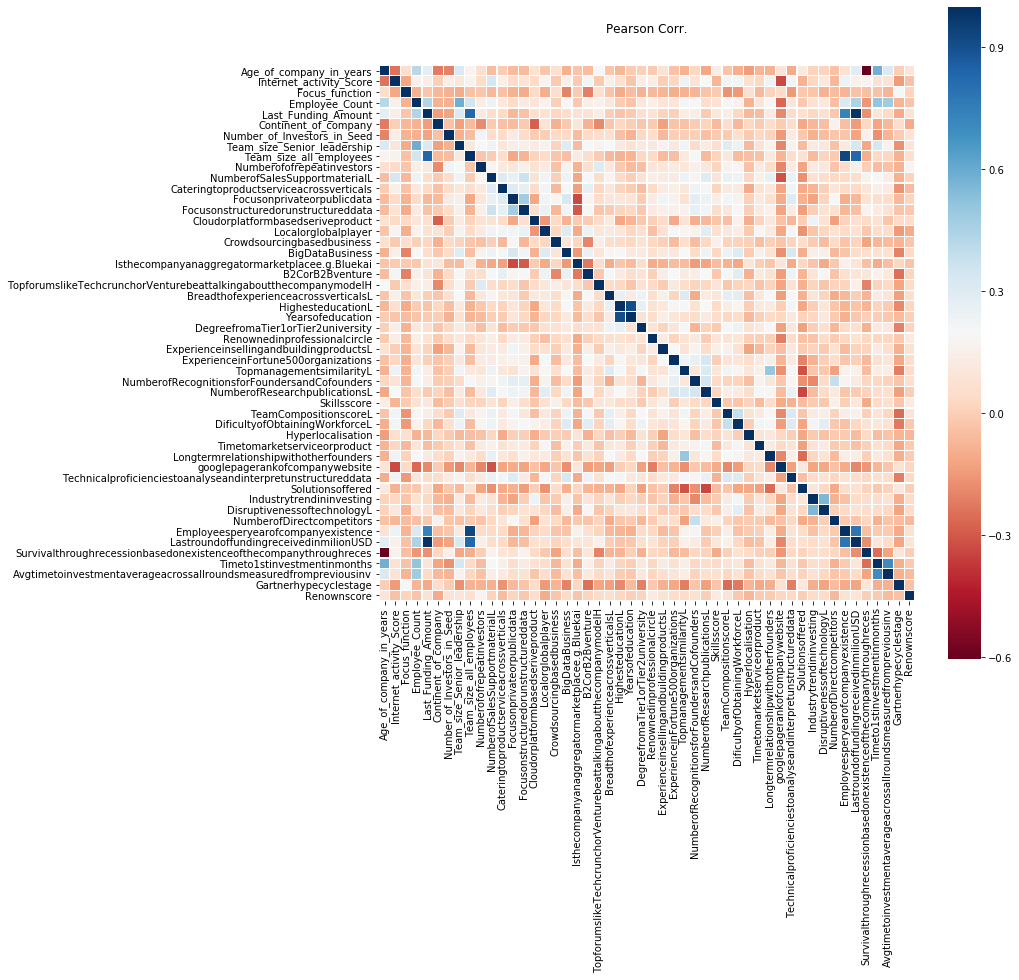

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(features.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

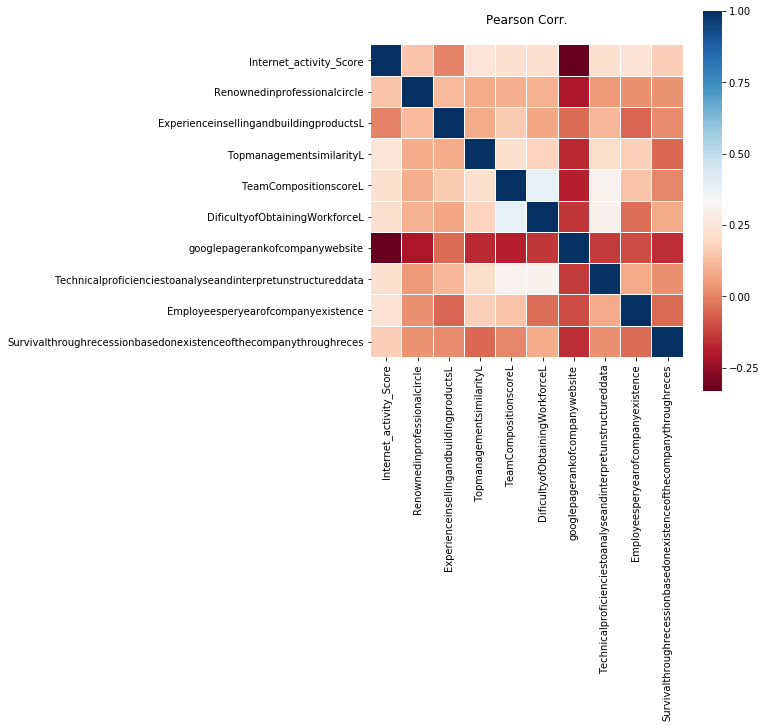

In [0]:
df_10 = imp_features.head(10)
df_10.Features_name.to_numpy()

features_10 = pd.DataFrame()
for col in X.columns:
   if(col in df_10.Features_name.to_numpy()):
       features_10[col]=X[col].iloc[:]

colormap = plt.cm.RdBu
plt.figure(figsize=(7,7))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(features_10.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

In [0]:
features_10.columns

Index(['Internet_activity_Score', 'Renownedinprofessionalcircle',
       'ExperienceinsellingandbuildingproductsL', 'TopmanagementsimilarityL',
       'TeamCompositionscoreL', 'DificultyofObtainingWorkforceL',
       'googlepagerankofcompanywebsite',
       'Technicalproficienciestoanalyseandinterpretunstructureddata',
       'Employeesperyearofcompanyexistence',
       'Survivalthroughrecessionbasedonexistenceofthecompanythroughreces'],
      dtype='object')

In [0]:
model_Gaus.fit(X_train,y_train)
model_Gaus.score(X_test,y_test)

0.8

In [0]:
model_Gaus.fit(features,y)
model_Gaus.score(features,y)

0.7838983050847458

In [0]:
#model_MultiN.fit(X_train,y_train)
#model_MultiN.score(X_test,y_test)

## Naive Bayes - **GridSearch**

1.   List item
2.   List item




In [0]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),features,y,cv=5)

array([0.70526316, 0.76842105, 0.72340426, 0.71276596, 0.55319149])

In [0]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(GaussianNB(),{},cv=5, return_train_score=False,)
clf.fit(features,y)
clf.cv_results_
results = pd.DataFrame(clf.cv_results_)
results[['mean_test_score']]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_test_score
0,0.692797


## **Logistic Regression- GridSearch**








In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(),{'C':[1,5,10],'class_weight':[None,'balanced'],
                                         'solver':['newton-cg','lbfgs','liblinear','saga'] 

}, cv=5, return_train_score=False)
clf.fit(features,y)
clf.cv_results_
results2 = pd.DataFrame(clf.cv_results_)
results2[['param_C','param_class_weight','param_solver','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_C,param_class_weight,param_solver,mean_test_score
0,1,None,newton-cg,0.832627
8,5,None,newton-cg,0.824153
16,10,None,newton-cg,0.822034
20,10,balanced,newton-cg,0.819915
4,1,balanced,newton-cg,0.817797
12,5,balanced,newton-cg,0.815678
6,1,balanced,liblinear,0.766949
14,5,balanced,liblinear,0.766949
22,10,balanced,liblinear,0.766949
10,5,None,liblinear,0.688559


## **Decision Tree-GridSearch**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(),
                   {'criterion': ['gini','entropy'],'class_weight':[None,'balanced']
                      }, cv=5, return_train_score=False)
clf.fit(features,y)
clf.cv_results_
results2 = pd.DataFrame(clf.cv_results_)
results2[['param_criterion','param_class_weight','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_criterion,param_class_weight,mean_test_score
0,gini,None,0.800847
1,entropy,None,0.790254
3,entropy,balanced,0.790254
2,gini,balanced,0.777542


## RandomForest-GridSearch

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf_rf = GridSearchCV(RandomForestClassifier(),{'criterion': ['gini','entropy'],'class_weight':[None,'balanced'],'n_estimators':[50,100,200]
                      }, cv=5, return_train_score=False)
clf_rf.fit(features,y)
clf_rf.cv_results_
results2 = pd.DataFrame(clf_rf.cv_results_)
results2[['param_criterion','param_class_weight','param_n_estimators','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_criterion,param_class_weight,param_n_estimators,mean_test_score
9,entropy,balanced,50,0.862288
6,gini,balanced,50,0.855932
2,gini,None,200,0.851695
0,gini,None,50,0.849576
4,entropy,None,100,0.849576
8,gini,balanced,200,0.849576
11,entropy,balanced,200,0.849576
5,entropy,None,200,0.847458
7,gini,balanced,100,0.847458
3,entropy,None,50,0.845339


## SVM


In [0]:
from sklearn import svm

In [0]:
'''
from sklearn.model_selection import GridSearchCV
clf_svc = GridSearchCV(svm.SVC(gamma='auto'),{'C': [0.1,1],'kernel': ['rbf','linear']
                      }, cv=2, return_train_score=False)
clf_svc.fit(features,y)
clf_svc.cv_results_
results2 = pd.DataFrame(clf_svc.cv_results_)
results2[['param_C','param_kernel','mean_test_score']].sort_values('mean_test_score',ascending=False)
'''


"\nfrom sklearn.model_selection import GridSearchCV\nclf_svc = GridSearchCV(svm.SVC(gamma='auto'),{'C': [0.1,1],'kernel': ['rbf','linear']\n                      }, cv=2, return_train_score=False)\nclf_svc.fit(features,y)\nclf_svc.cv_results_\nresults2 = pd.DataFrame(clf_svc.cv_results_)\nresults2[['param_C','param_kernel','mean_test_score']].sort_values('mean_test_score',ascending=False)\n"

In [0]:
from sklearn.svm import SVC
model_svc = SVC()

In [0]:
model_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
model_svc.score(X_test,y_test)

0.6

In [0]:
model_svc1 = SVC(C=0.1,class_weight='balanced',kernel='poly',degree=4)
model_svc1.fit(X_train, y_train)
model_svc1.score(X_test,y_test)

0.6

## Boosting Classifier-**GridSearch**





In [0]:
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [0]:
# Create boosting classifiers
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]

eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, features, y, cv=5, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.852, std: (+/-) 0.058 [Ada Boost]
Mean: 0.867, std: (+/-) 0.055 [Grad Boost]
Mean: 0.854, std: (+/-) 0.063 [XG Boost]
Mean: 0.864, std: (+/-) 0.060 [Ensemble]


# **EDA**

In [0]:
features_10.head(10)

,Internet_activity_Score,Renownedinprofessionalcircle,ExperienceinsellingandbuildingproductsL,TopmanagementsimilarityL,TeamCompositionscoreL,DificultyofObtainingWorkforceL,googlepagerankofcompanywebsite,Technicalproficienciestoanalyseandinterpretunstructureddata,Employeesperyearofcompanyexistence,Survivalthroughrecessionbasedonexistenceofthecompanythroughreces
0,-1.0,500.00000,2,0,1,1,9626884.0,0,2.0,2
1,125.0,500.00000,3,2,3,2,1067034.0,1,7.0,2
2,455.0,500.00000,3,2,3,2,71391.0,1,3.0,2
3,-99.0,460.55821,1,2,2,2,11847.0,0,10.0,2
4,496.0,500.00000,3,1,2,2,201814.0,1,10.0,2
5,106.0,500.00000,1,1,2,2,591816.0,1,4.0,2
6,39.0,472.80168,1,1,2,2,2345574.0,1,5.0,2
7,139.0,500.00000,2,3,2,2,1015027.0,1,10.0,2
8,306.0,500.00000,3,2,1,2,256921.0,1,17.0,2
9,53.0,500.00000,3,2,2,3,3639779.0,0,3.0,2


In [0]:
import plotly.express as px

fig = px.histogram(features_10, x="Internet_activity_Score", y="googlepagerankofcompanywebsite")
fig.show()

In [0]:
#features.to_excel('features_to_50.xlsx')

In [0]:
#y.to_excel('target_y.xlsx')

In [0]:
df_eda = pd.read_excel('ML_project_final_only_top_10.xlsx')

In [0]:
fig = px.histogram(df_eda, x="Internet_activity_Score", color="Company_Status")
fig.show()

In [0]:
fig = px.histogram(df_eda, x="googlepagerankofcompanywebsite", color="Company_Status")
fig.show()

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_eda_sc=sc.fit_transform(df_eda)
df_eda_sc=sc.transform(df_eda)
df_eda_sc = pd.DataFrame(df_eda_sc, columns=[df_eda.columns])

In [0]:
df_eda_sc.head()

,Company_Status,Internet_activity_Score,Renownedinprofessionalcircle,ExperienceinsellingandbuildingproductsL,TopmanagementsimilarityL,TeamCompositionscoreL,DificultyofObtainingWorkforceL,googlepagerankofcompanywebsite,Technicalproficienciestoanalyseandinterpretunstructureddata,Employeesperyearofcompanyexistence,Survivalthroughrecessionbasedonexistenceofthecompanythroughreces
0,0.73996,-0.514056,0.394078,0.057089,-0.744745,-0.788319,-0.803673,1.826797,-0.760655,-0.250746,0.499724
1,0.73996,0.078022,0.394078,1.228659,1.067212,1.822815,0.622393,-0.539285,1.314657,-0.170213,0.499724
2,0.73996,1.628701,0.394078,1.228659,1.067212,1.822815,0.622393,-0.814497,1.314657,-0.234640,0.499724
3,0.73996,-0.974561,-0.087001,-1.114480,1.067212,0.517248,0.622393,-0.830956,-0.760655,-0.121893,0.499724
4,0.73996,1.821362,0.394078,1.228659,0.161233,0.517248,0.622393,-0.778446,1.314657,-0.121893,0.499724


In [0]:
#df_eda_sc.to_excel('df_eda_sc.xlsx')

In [0]:
df_eda_sc = pd.read_excel('df_eda_sc_new_2.xlsx')

In [0]:
df_eda_sc.head()

,Company_Status,Internet_activity_Score,Renownedinprofessionalcircle,ExperienceinsellingandbuildingproductsL,TopmanagementsimilarityL,TeamCompositionscoreL,DificultyofObtainingWorkforceL,googlepagerankofcompanywebsite,Technicalproficienciestoanalyseandinterpretunstructureddata,Employeesperyearofcompanyexistence,Survivalthroughrecessionbasedonexistenceofthecompanythroughreces
0,1,-0.514056,0.394078,0.057089,-0.744745,-0.788319,-0.803673,1.826797,-0.760655,-0.250746,0.499724
1,1,0.078022,0.394078,1.228659,1.067212,1.822815,0.622393,-0.539285,1.314657,-0.170213,0.499724
2,1,1.628701,0.394078,1.228659,1.067212,1.822815,0.622393,-0.814497,1.314657,-0.234640,0.499724
3,1,-0.974561,-0.087001,-1.114480,1.067212,0.517248,0.622393,-0.830956,-0.760655,-0.121893,0.499724
4,1,1.821362,0.394078,1.228659,0.161233,0.517248,0.622393,-0.778446,1.314657,-0.121893,0.499724


In [0]:
fig = px.histogram(df_eda_sc, x="Internet_activity_Score", color="Company_Status")
fig.show()

In [0]:
import plotly.figure_factory as ff

# Group data together
hist_data = [df_eda_sc['googlepagerankofcompanywebsite'], df_eda_sc['Internet_activity_Score'],df_eda_sc['Renownedinprofessionalcircle'],df_eda_sc['Employeesperyearofcompanyexistence']]

group_labels = ['Google Pg Rank', 'Internet Score','Renowned Name','Avg Employees per yr']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

In [0]:
import plotly.figure_factory as ff

# Group data together
hist_data = [df_eda_sc['googlepagerankofcompanywebsite'], df_eda_sc['Internet_activity_Score']]

group_labels = ['Google Pg Rank', 'Internet Score']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

In [0]:
# Group data together
hist_data = [df_eda_sc['Renownedinprofessionalcircle'],df_eda_sc['Employeesperyearofcompanyexistence']]

group_labels = ['Renowned Name','Avg Employees per yr']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

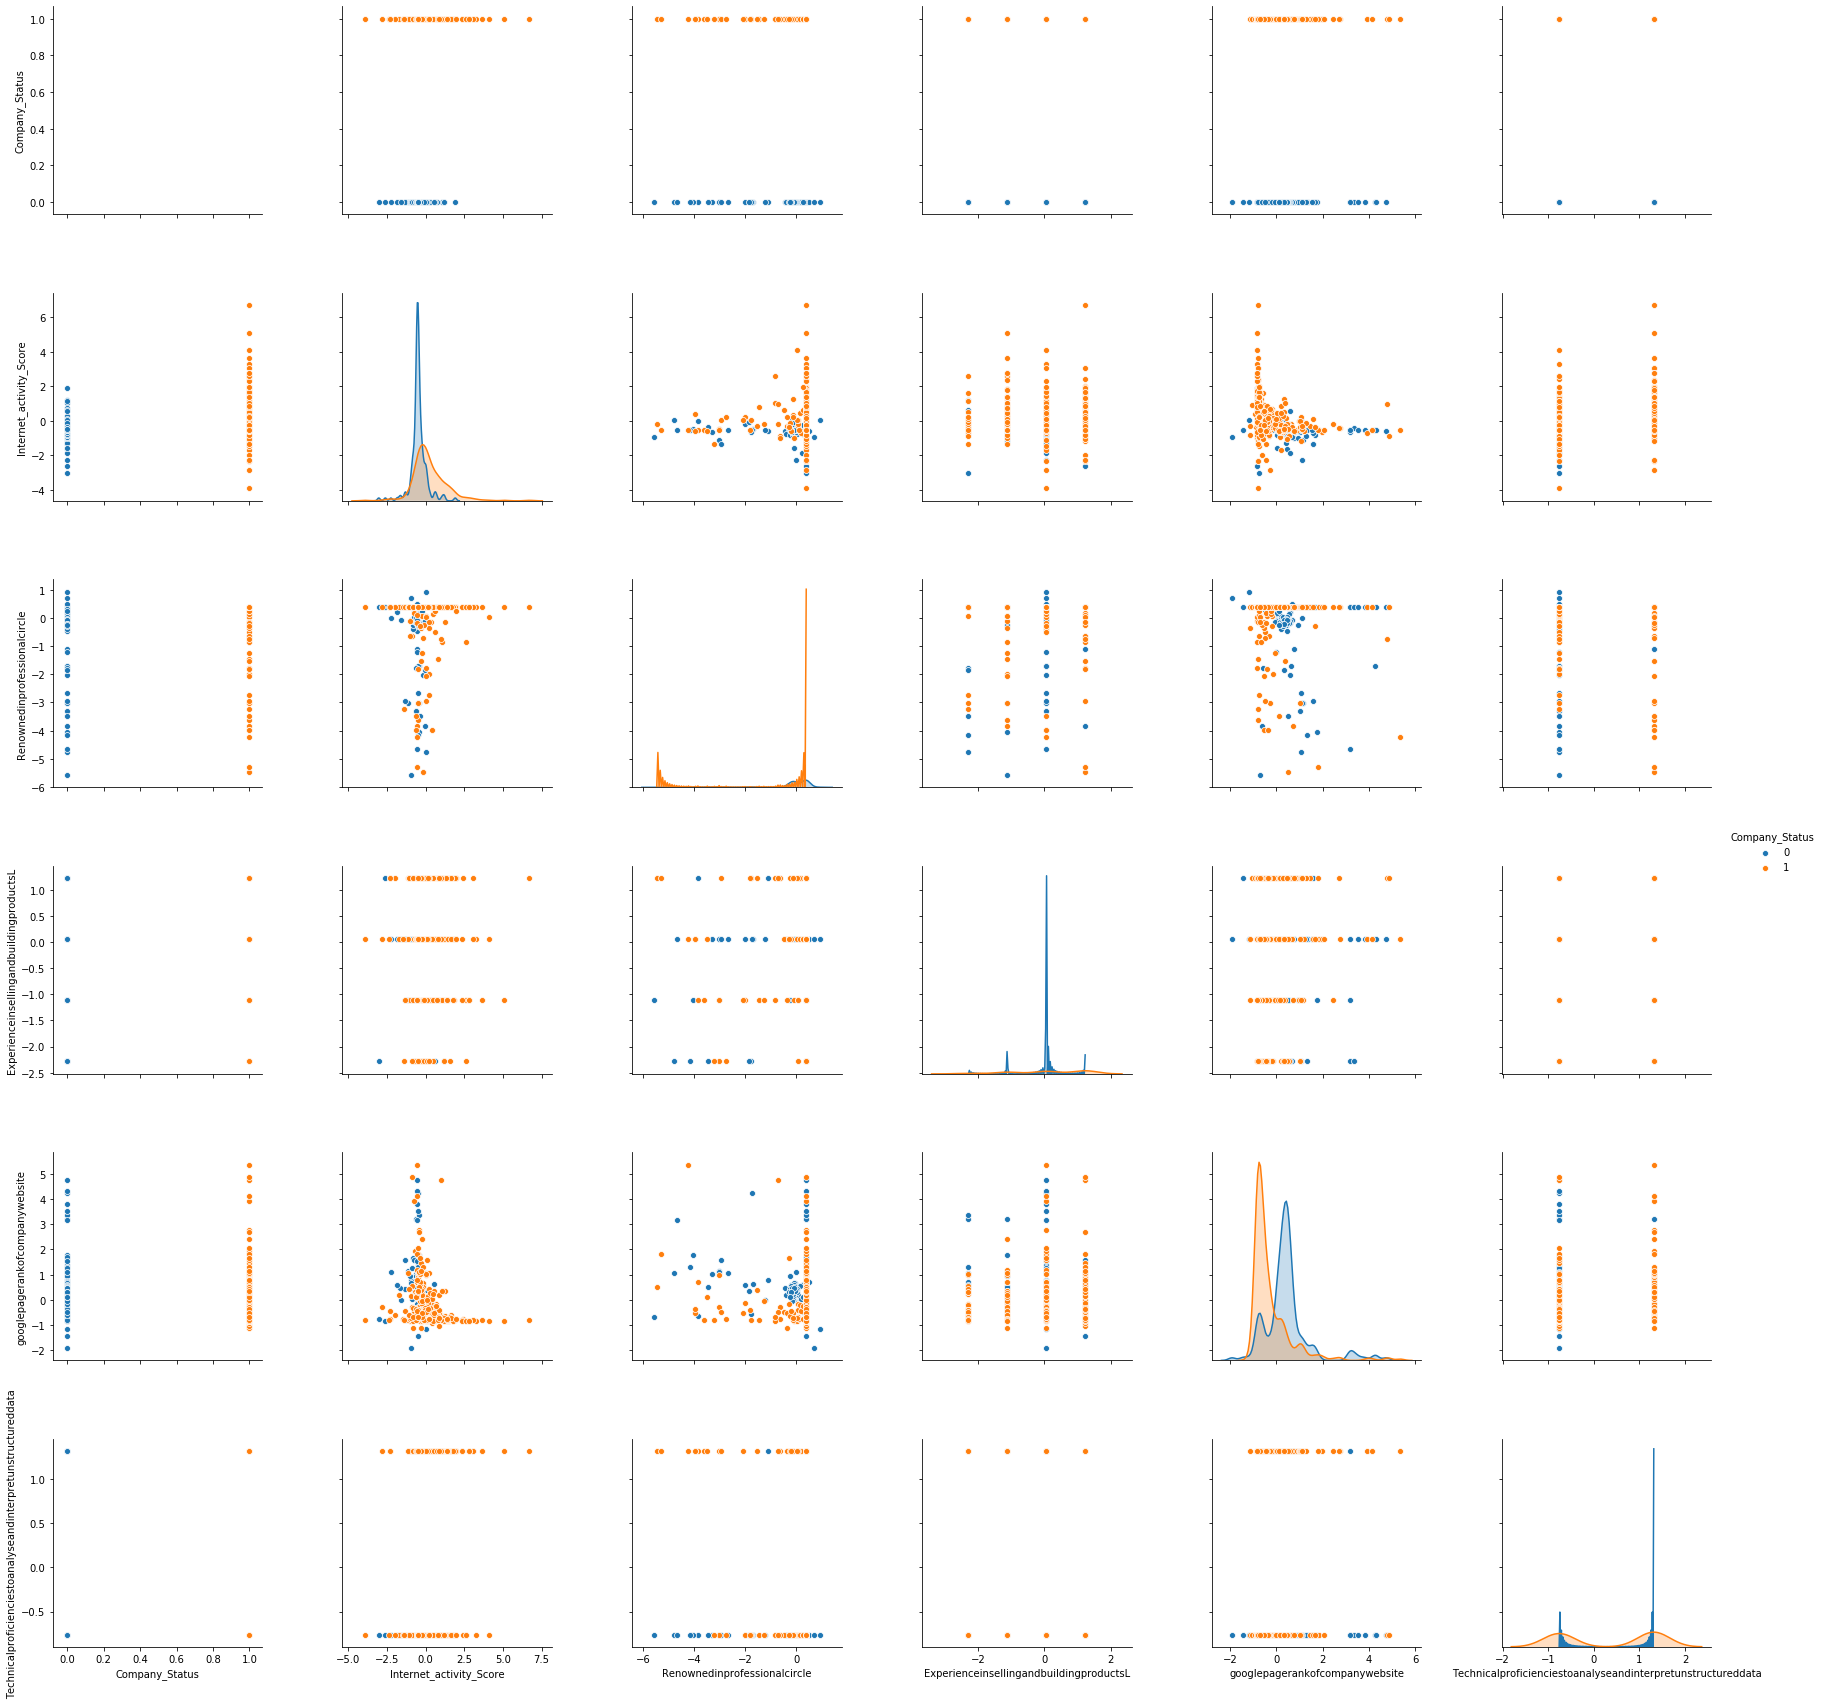

In [0]:
df_pp = df_eda_sc.drop(['TopmanagementsimilarityL', 'Employeesperyearofcompanyexistence','DificultyofObtainingWorkforceL','TeamCompositionscoreL','Survivalthroughrecessionbasedonexistenceofthecompanythroughreces'], axis=1)
g = sns.pairplot(df_pp, hue="Company_Status",size = 4)

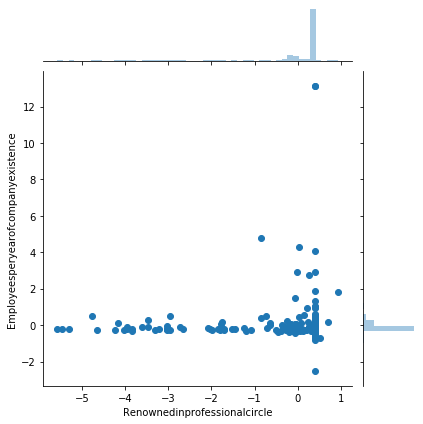

In [0]:
sns.jointplot(x="Renownedinprofessionalcircle", y="Employeesperyearofcompanyexistence", data=df_eda_sc);

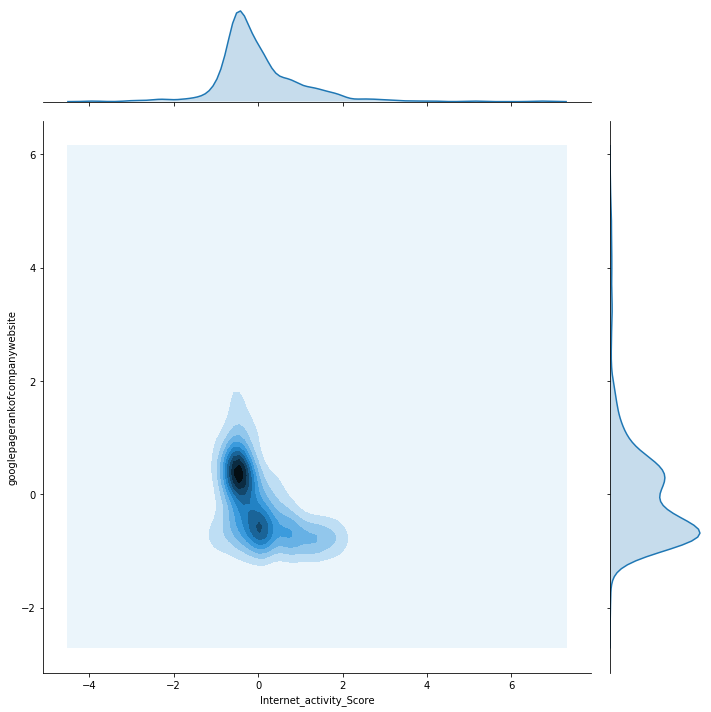

In [0]:
sns.jointplot(x="Internet_activity_Score", y="googlepagerankofcompanywebsite", data=df_eda_sc, kind='kde', hue='Company_Status', size=10)

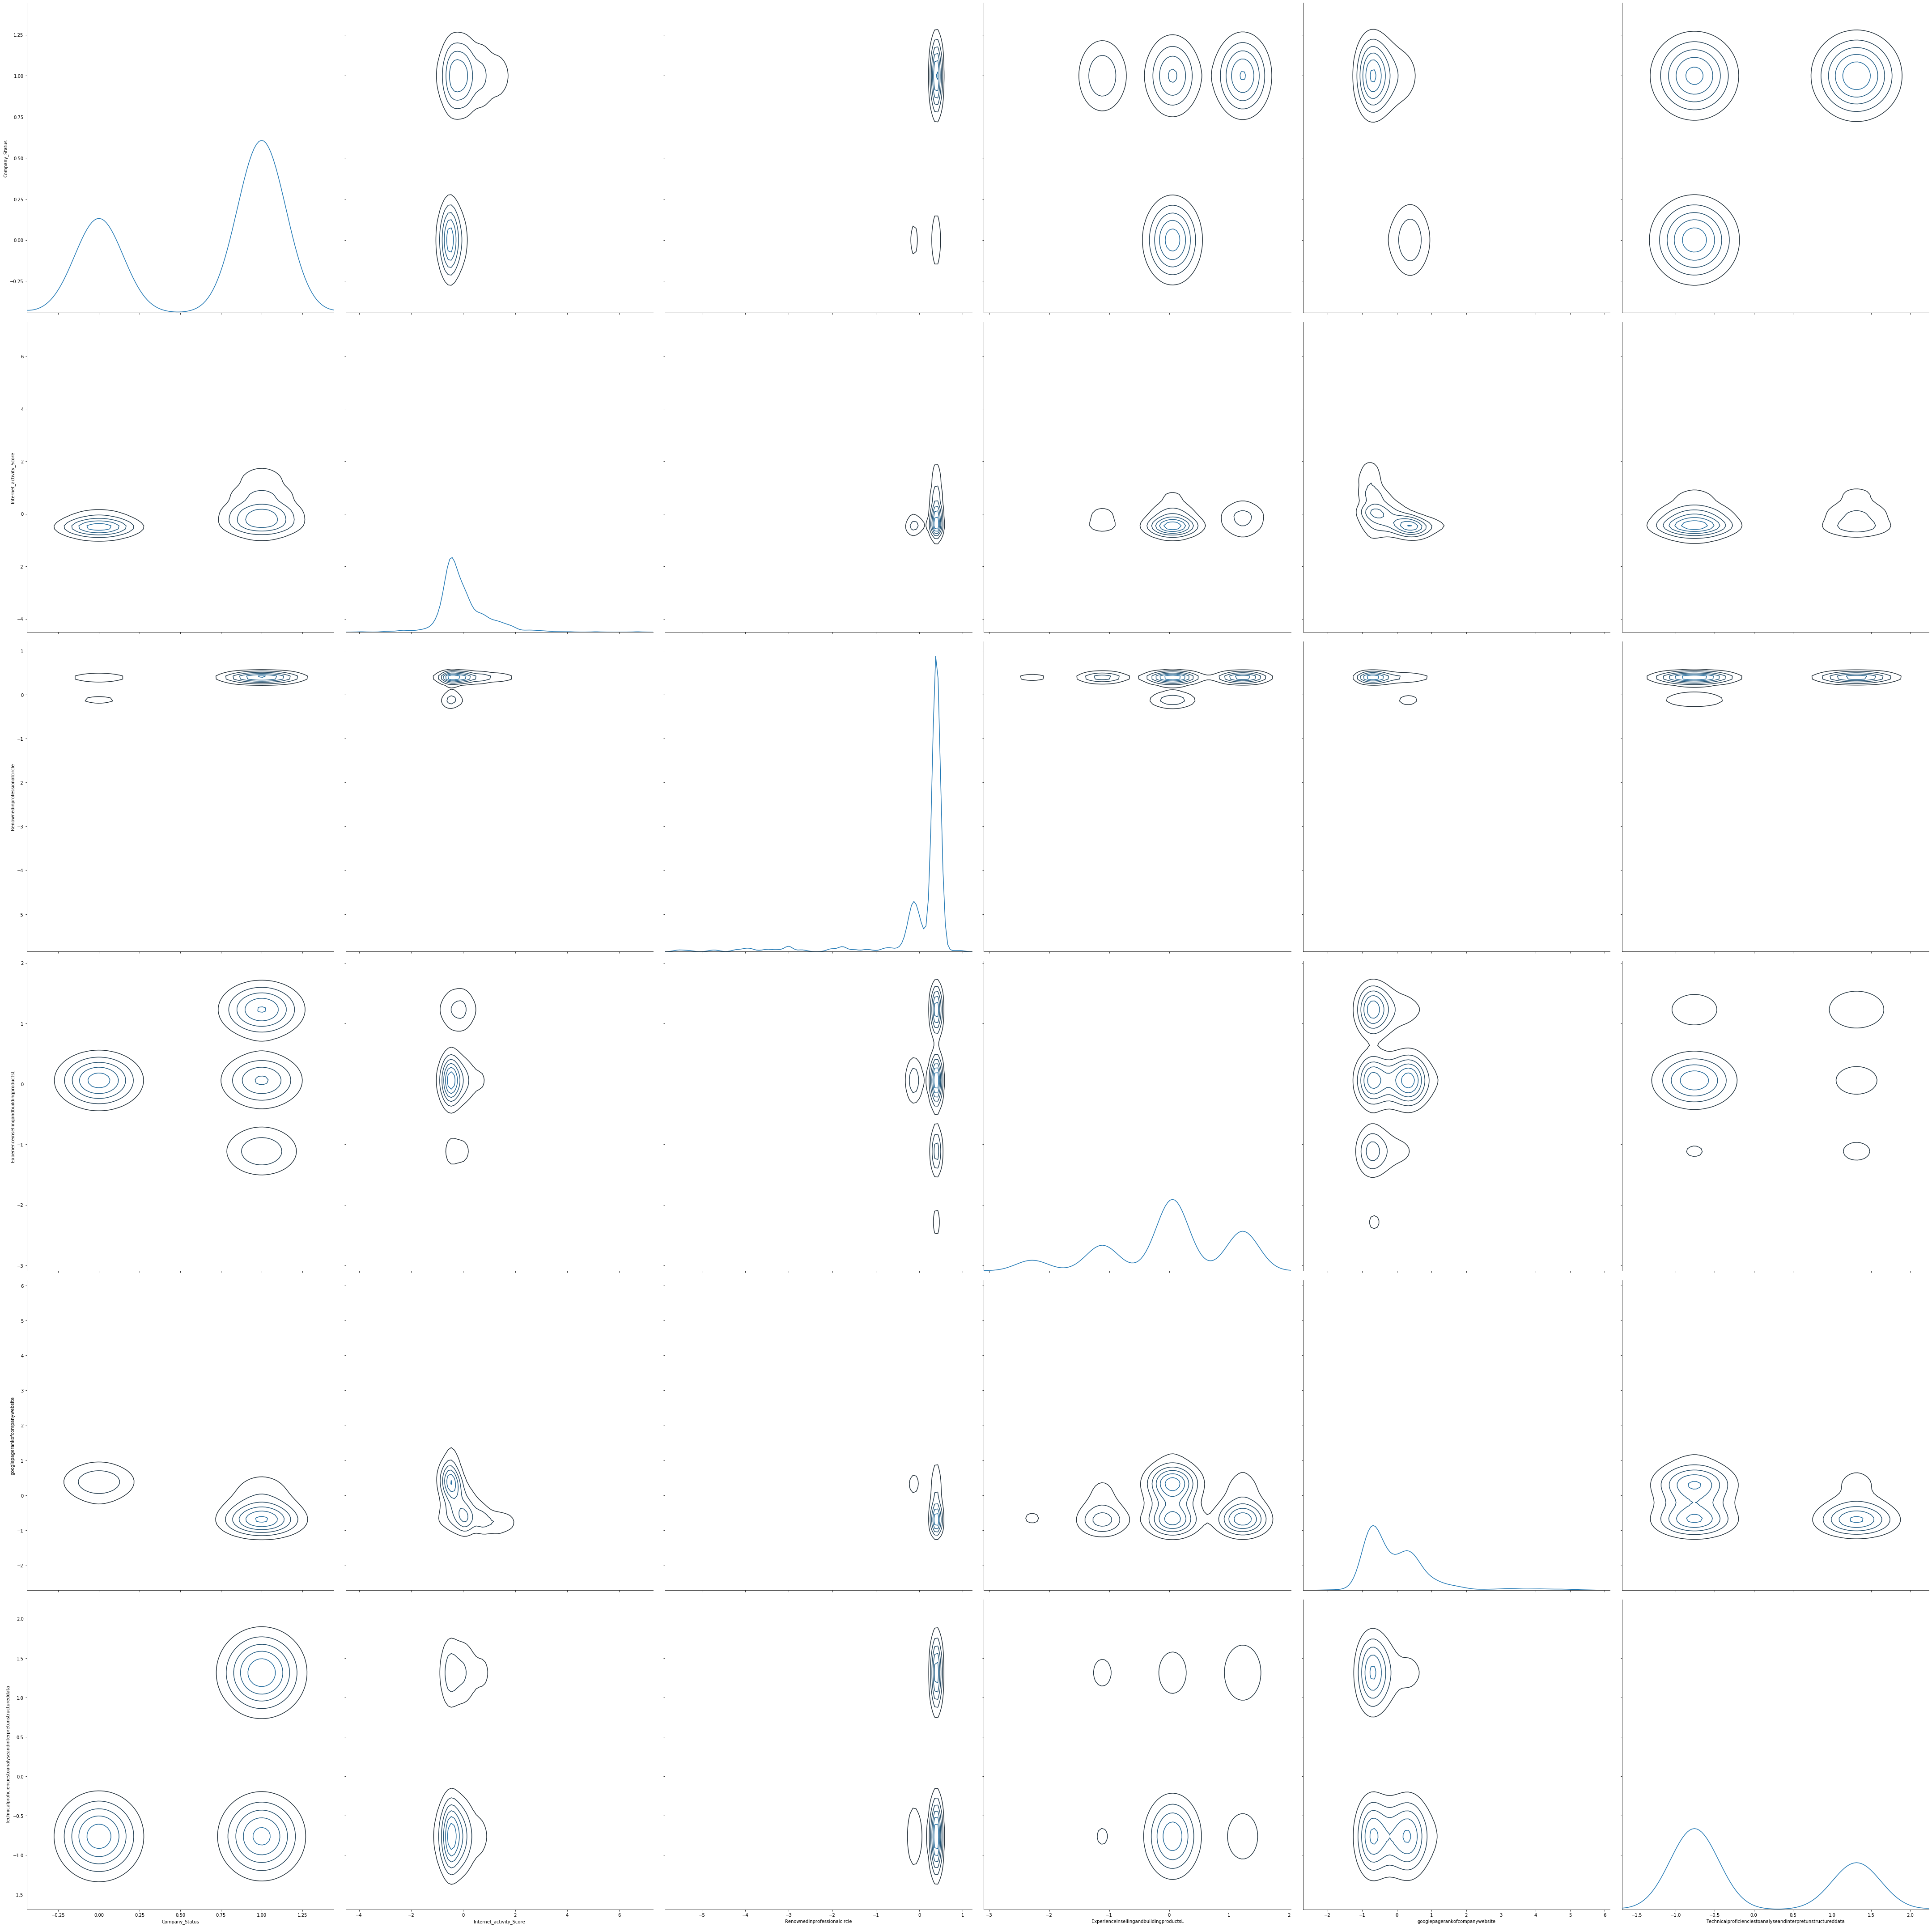

In [0]:
g = sns.PairGrid(df_pp, size=10)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

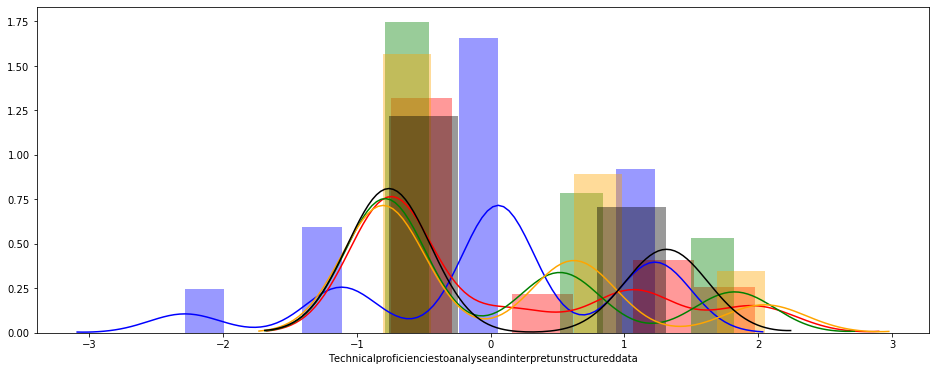

In [0]:
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.distplot(df_eda_sc[('ExperienceinsellingandbuildingproductsL')], color="blue")
sns.distplot(df_eda_sc['TopmanagementsimilarityL'] , color="red")
sns.distplot(df_eda_sc['TeamCompositionscoreL'] , color="green")
sns.distplot(df_eda_sc['DificultyofObtainingWorkforceL'] , color="orange")
sns.distplot(df_eda_sc['Technicalproficienciestoanalyseandinterpretunstructureddata'] , color="black")

In [0]:
import plotly.figure_factory as ff

hist_data = [df_eda['Employeesperyearofcompanyexistence']]
group_labels = ['Avg Employee per yr']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

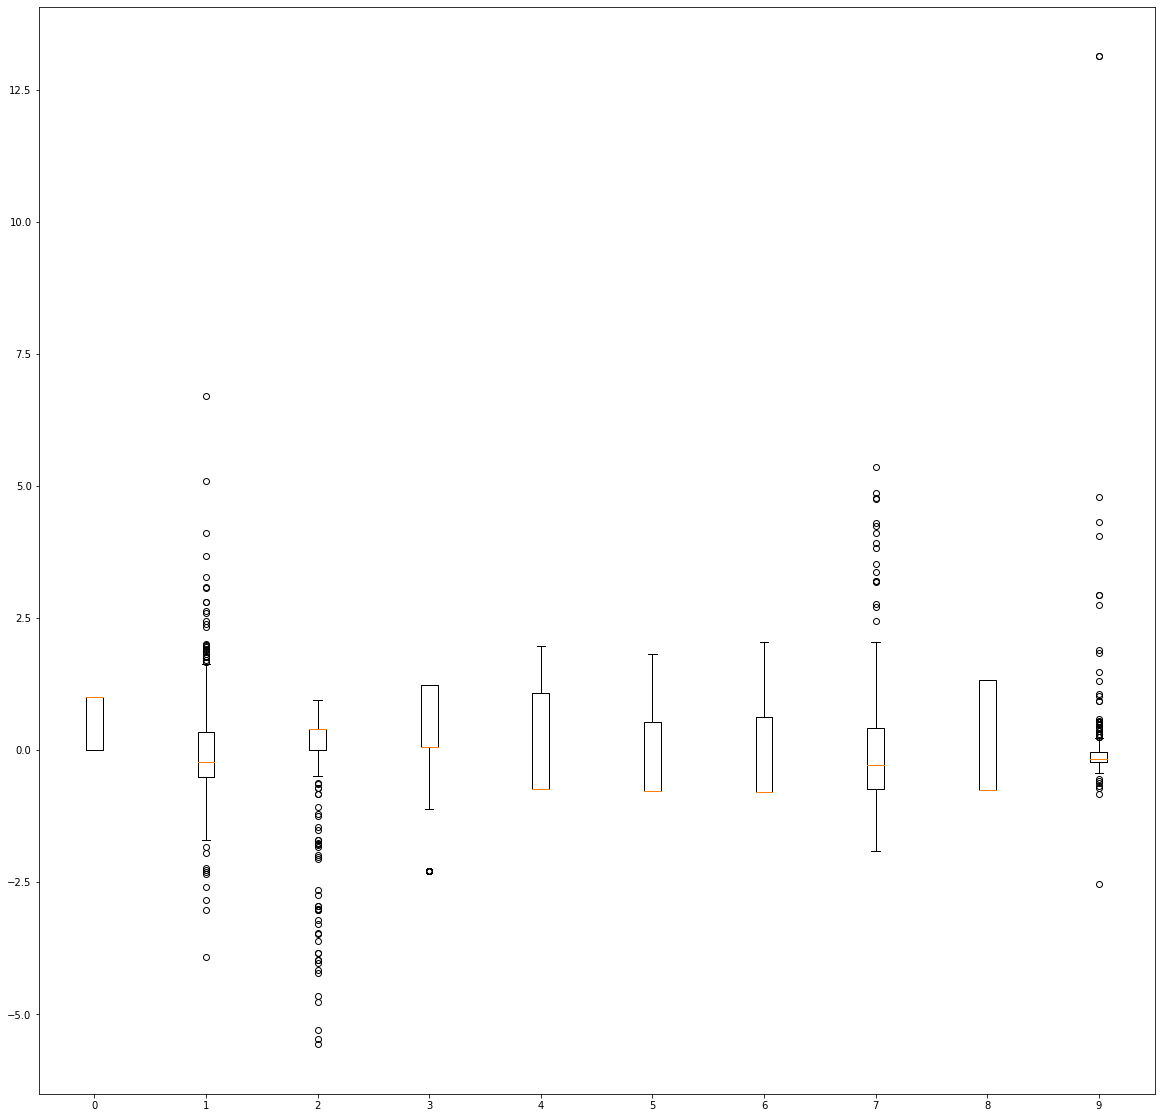

In [0]:
x = df_eda_sc
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)
for i in range(10):
  ax.boxplot(x.ix[:,i].values, positions = [i])

ax.set_xlim(-0.5, 9.5)
plt.show()

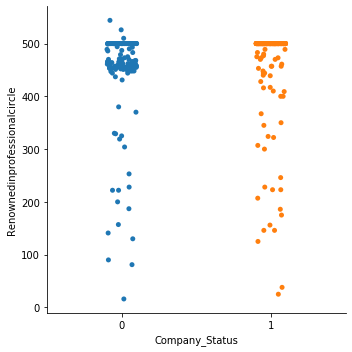

In [0]:
sns.catplot(x="Company_Status", y="Renownedinprofessionalcircle", data=df_eda)

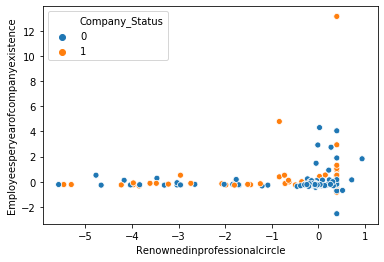

In [0]:
sns.scatterplot(x="Renownedinprofessionalcircle", y="Employeesperyearofcompanyexistence", hue='Company_Status', data=df_eda_sc)

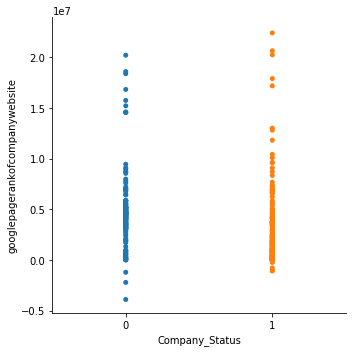

In [0]:
sns.catplot(x="Company_Status", y="googlepagerankofcompanywebsite", jitter=False, data=df_eda)

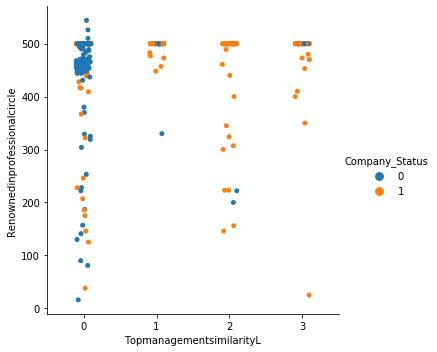

In [0]:
sns.catplot(x="TopmanagementsimilarityL", y="Renownedinprofessionalcircle", hue='Company_Status', data=df_eda)

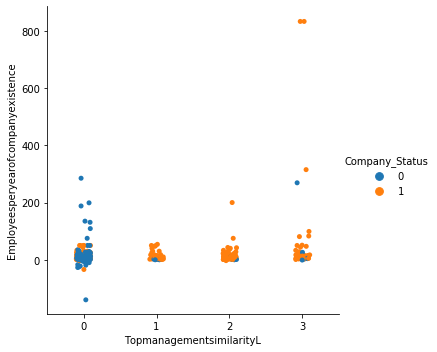

In [0]:
sns.catplot(x="TopmanagementsimilarityL", y="Employeesperyearofcompanyexistence", hue='Company_Status', data=df_eda)

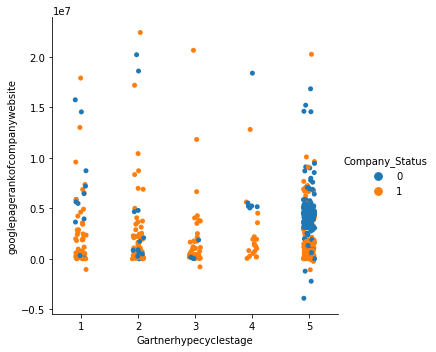

In [0]:
sns.catplot(x="Gartnerhypecyclestage", y="googlepagerankofcompanywebsite", hue='Company_Status', data=data)

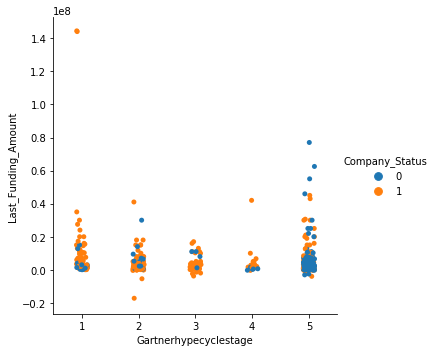

In [0]:
sns.catplot(x="Gartnerhypecyclestage", y="Last_Funding_Amount", hue='Company_Status', data=data)

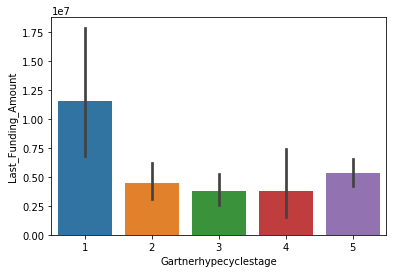

In [0]:
sns.barplot(x="Gartnerhypecyclestage", y="Last_Funding_Amount", data=data)

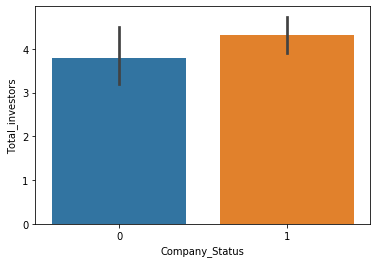

In [0]:
sns.barplot(x="Company_Status", y="Total_investors", data=data)

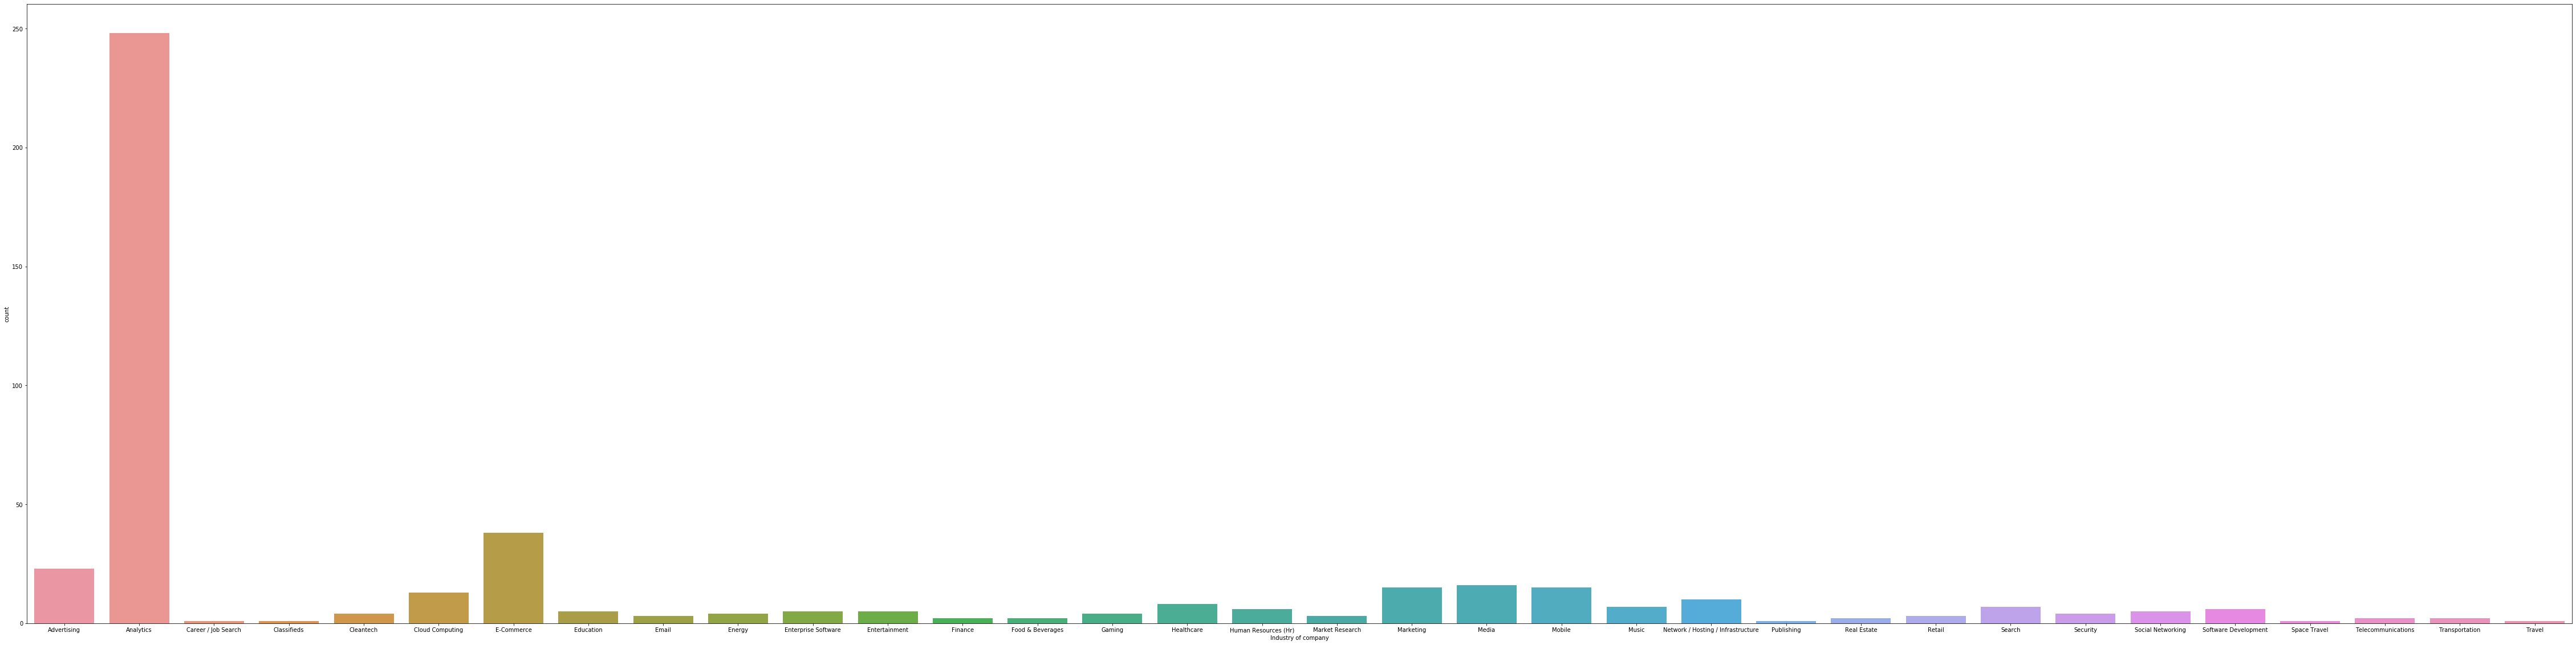

In [0]:
df_5 = pd.read_excel('5_new_data_5.xls')
plt.figure(figsize=(80, 20))
sns.countplot(x="Industry of company", data=df_5)

In [0]:
df_ff = pd.read_excel('focus_function.xlsx')

In [0]:
df_ff.head(3)

,Company_id,Company_Status,Age_of_company_in_years,Internet_activity_Score,Focus_function,Total_investors,Employee_Count,Has_the_team_size_grown,Last_Funding_Amount,Continent_of_company,Number_of_Investors_in_Seed,Number_of_Investors_in_Angel_andor_VC,Number_of_Cofounders,Number_of_advisors,Team_size_Senior_leadership,Team_size_all_employees,Presenceofatopangelorventurefundinpreviousroundofinvestment,Numberofofrepeatinvestors,NumberofSalesSupportmaterialL,Workedintopcompanies,AveragesizeofcompaniesworkedforinthepastL,Havebeenpartofstartupsinthepast,Havebeenpartofsuccessfulstartupsinthepast,WasheorshepartnerinBig5consulting,Consultingexperience,Productorservicecompany,Cateringtoproductserviceacrossverticals,Focusonprivateorpublicdata,Focusonconsumerdata,Focusonstructuredorunstructureddata,Subscriptionbasedbusiness,Cloudorplatformbasedseriveproduct,Localorglobalplayer,LinearorNonlinearbusinessmodel,Capitalintensivebusiness,NumberofofPartnersofcompanyL,Crowdsourcingbasedbusiness,Crowdfundingbasedbusiness,MachineLearningbasedbusiness,PredictiveAnalyticsbusiness,...,HighesteducationL,Yearsofeducation,Relevanceofeducationtoventure,Relevanceofexperiencetoventure,DegreefromaTier1orTier2university,Renownedinprofessionalcircle,ExperienceinsellingandbuildingproductsL,ExperienceinFortune100organizations,ExperienceinFortune500organizations,ExperienceinFortune1000organizations,TopmanagementsimilarityL,NumberofRecognitionsforFoundersandCofounders,NumberofResearchpublicationsL,Skillsscore,TeamCompositionscoreL,DificultyofObtainingWorkforceL,PricingStrategy,Hyperlocalisation,Timetomarketserviceorproduct,Longtermrelationshipwithotherfounders,Proprietaryorpatentpositioncompetitiveposition,Barriersofentryforthecompetitors,Companyawards,Controversialhistoryoffounderorcofounder,Legalriskandintellectualproperty,googlepagerankofcompanywebsite,Technicalproficienciestoanalyseandinterpretunstructureddata,Solutionsoffered,Investedthroughglobalincubationcompetitions,Industrytrendininvesting,DisruptivenessoftechnologyL,NumberofDirectcompetitors,Employeesperyearofcompanyexistence,LastroundoffundingreceivedinmilionUSD,Survivalthroughrecessionbasedonexistenceofthecompanythroughreces,Timeto1stinvestmentinmonths,Avgtimetoinvestmentaverageacrossallroundsmeasuredfrompreviousinv,Gartnerhypecyclestage,Timetomaturityoftechnologyinyears,Renownscore
0,1,1,5.069814,-1.0,4,7.000000,3.000000,0,4.500000e+05,1,2.0,0.0,1,2,2,15.0,1,4.0,0,0,1,0,0,0,0,2,0,2,0,1,1,2,2,1,1,0.0,0,0,0,0,...,2,21.0,1,1,2,500.0,2,0,0,0,0,0.0,0,0.0,1,1,1,0,3,0,0,1,0,0,0,9626884.0,0,1,0,2,1,0.0,2.0,0.0,2,6.801546,12.0,5,2,0.0
1,2,1,3.000000,125.0,2,7.987438,11.632394,0,5.070970e+06,1,5.0,0.0,2,0,4,20.0,0,0.0,2,1,3,1,1,0,0,1,0,3,1,1,0,2,1,2,0,1.0,1,0,1,1,...,2,21.0,1,1,2,500.0,3,0,0,0,2,13.0,0,34.0,3,2,1,0,1,0,1,1,0,0,1,1067034.0,1,1,0,3,2,0.0,7.0,5.0,2,10.000000,9.0,3,2,8.0
2,3,1,3.000000,455.0,1,28.000000,14.000000,0,2.350000e+06,1,15.0,0.0,3,0,7,10.0,0,0.0,1,1,2,0,0,0,0,3,1,2,1,1,1,3,1,2,0,1.0,0,0,0,1,...,1,18.0,1,1,3,500.0,3,0,0,1,2,18.0,0,36.0,3,2,1,0,1,1,1,1,0,0,0,71391.0,1,1,1,3,2,0.0,3.0,2.0,2,2.000000,7.0,3,2,9.0


In [0]:
#Focus_function

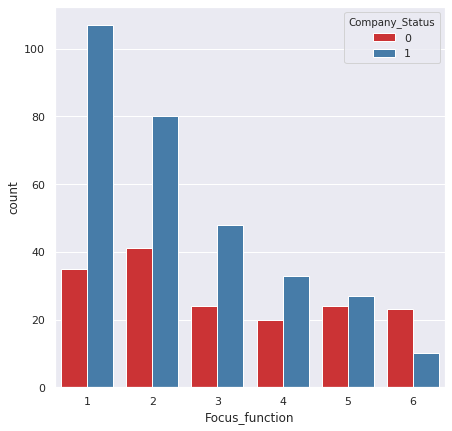

In [0]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 7))
ax = sns.countplot((x='Focus_function', hue='Company_Status',palette="Set1",data=df_ff)

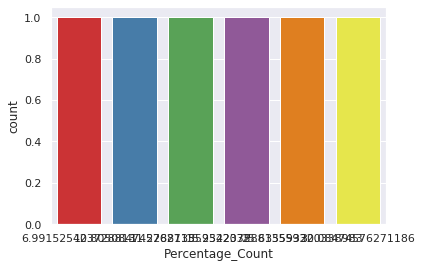

In [0]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Focus_function", hue='Company_Status', palette="Set1", data=df_ff)

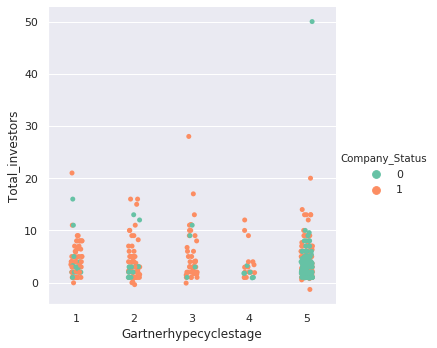

In [0]:
sns.catplot(x="Gartnerhypecyclestage", y="Total_investors", hue='Company_Status', palette="Set2", data=data)

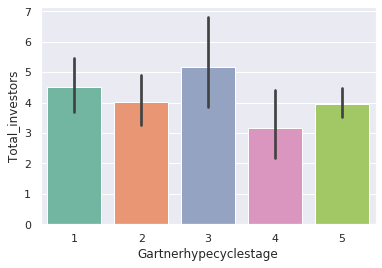

In [0]:
sns.barplot(x="Gartnerhypecyclestage", y="Total_investors", palette="Set2", data=data)

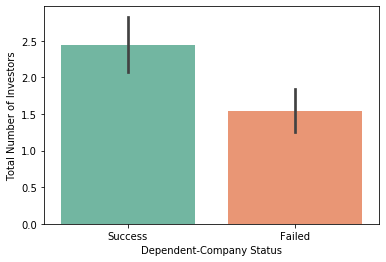

In [0]:
sns.barplot(x="Dependent-Company Status", y="Total Number of Investors", palette="Set2", data=df_5)